<h3><b>Neural Networks</b></h3> 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt # ony pyplot required
sb.set() #seaborn style for graphics


In [2]:
skew_corrected_final_data = pd.read_csv("Assets/skew_Corrected_Final_data.csv")

In [3]:
# Extract Response and Predictors
y = pd.DataFrame(skew_corrected_final_data["price(USD)"])
X = pd.DataFrame(skew_corrected_final_data[["averageDifficulty","cumulative total number of coins","activeAddresses", "Daily Hash Rate(Trillions of hashes/s)"]])

In [14]:
X

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
0,16.125696,11102989.80,83564,4.278455
1,16.125696,11106339.80,81920,4.299074
2,16.125696,11109764.80,82804,4.299074
3,16.125696,11113739.80,69959,4.345594
4,16.125696,11117864.80,72103,4.402392
...,...,...,...,...
2005,29.602320,17330008.54,580054,17.698318
2006,29.602320,17331758.54,560480,17.727306
2007,29.602320,17333583.54,708285,17.769270
2008,29.602320,17335508.54,697601,17.822616


In [15]:
y

,price(USD)
0,4.934474
1,4.756861
2,4.665795
3,4.585987
4,4.726502
...,...
2005,8.776605
2006,8.776886
2007,8.778380
2008,8.754167


In [16]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1608, 1) (1608, 4)
Test Set  : (402, 1) (402, 4)


In [17]:
y_train
y_test

,price(USD)
1358,6.812752
1480,7.592991
668,5.535443
593,5.861811
1558,8.088749
...,...
892,5.496102
1753,9.230878
916,5.891285
805,5.663134


In [18]:
X_train

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
54,16.777648,11329114.8,64862,4.957806
1462,26.980933,16307064.8,787411,15.226425
1689,28.094755,16743739.8,1179829,16.408164
1485,27.113507,16351614.8,842960,15.390071
1419,26.888684,16227139.8,651290,14.983665
...,...,...,...,...
44,16.563142,11289314.8,75762,4.893583
1252,26.208063,15910977.3,600999,14.454546
15,16.230286,11162914.8,84113,4.494636
1749,28.685333,16863152.3,852830,16.969773


In [19]:
X_train.describe()

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
count,1608.000000,1.608000e+03,1.608000e+03,1608.000000
mean,24.984330,1.476566e+07,4.297702e+05,13.219041
std,3.267952,1.846588e+06,2.622506e+05,3.216334
min,16.125696,1.110299e+07,4.878500e+04,4.278455
25%,24.034853,1.323108e+07,1.911515e+05,12.274116
50%,25.450654,1.510148e+07,4.339850e+05,13.715430
75%,27.243887,1.638804e+07,6.322188e+05,15.417755
max,29.639235,1.738886e+07,1.261348e+06,17.911346


<p><b>From the above data, we notice that the inpendent variables we are using to predict the price have quite a huge range of values between each other, with the range of around 10^7, hence this cause a hindrance in our ml model.</b></p>
<p><b>Hence we peform scaling to tackle this possible issue.</b></p>

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)


In [21]:
print (train_scaled)

[[-2.51204305 -1.86160478 -1.39188133 -2.56932433]
 [ 0.61115474  0.83498934  1.3641614   0.62431598]
 [ 0.95209251  1.07153958  2.86097445  0.99184801]
 ...
 [-2.67958898 -1.95163661 -1.3184516  -2.71337458]
 [ 1.13286682  1.13622625  1.61369127  1.16651389]
 [-0.04655645 -0.00919448 -0.27869103 -0.07063908]]


In [22]:
print(test_scaled)

[[ 0.47721128  0.72854377  0.83993469  0.47405226]
 [ 0.63266395  0.85385431  1.60962138  0.65965181]
 [-0.12784302 -0.47429122 -0.56176797 -0.17545462]
 ...
 [-0.03974427  0.01757942  0.07284555 -0.03701388]
 [-0.1003211  -0.20496767 -0.58925787 -0.14519573]
 [ 0.58291735  0.79077245  0.9372574   0.61080955]]


<p><b>The target variable does not need to be scaled as these scaled values will also be able to predict the target variable, the only difference in the model will the individual weights each parameter gets</b></p>

<p><b>We will further explore how scaling affects different types of models and if it neceassary.</b></p>

<h3><b>Neural Networks</b></h3>

In [23]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(train_scaled, y_train)


/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [24]:
print(model.predict(train_scaled))

[4.62969103 7.57619141 9.69990291 ... 4.38380487 9.12149601 5.50318747]


In [25]:
y_train

,price(USD)
54,4.681205
1462,7.259137
1689,9.717236
1485,7.802307
1419,6.944319
...,...
44,4.643910
1252,6.416814
15,4.738126
1749,9.096804


In [26]:
print(model.predict(test_scaled))

[ 6.93190683  7.83920011  5.58249611  5.76758337  7.49674916  6.08700065
  6.48924409  7.13098472  8.77049869  5.57493241  6.13919215  8.71983963
  7.56542856  7.49802533  7.85027268  7.5658691   5.67079519  4.45921325
  6.74937733  7.21988702  5.49842652  8.50819196  8.89333442  5.60640635
  5.58602668  6.26137047  6.13352853  5.71689831  6.6445863   4.41234053
  4.62346453  6.22996793  6.35197668  5.84130423  5.62785775  6.23420521
  5.63100915  6.38972982  6.70996493  6.14219226  5.92712992  8.51658837
  6.95326345  6.16027182  5.61438911  5.48440042  5.5406198   5.54799951
  8.94277669  6.17092554  5.46830412  6.35149404  7.31392436  8.64918036
  6.3119375   6.20407219  7.12502499  7.68077852  5.47878529  6.57608345
  6.2504881   7.8017253   6.43188313  6.14014972  9.36180631  9.29704997
  8.75818494  6.05003563  7.50859184  5.5328764   6.02087676  6.22735976
  7.41991274  5.7174263   5.89284276  5.64285784  7.47318154  6.22985793
  6.16271045  7.36022193  7.05703689  7.71484625  5

In [27]:
print (y_test)

      price(USD)
1358    6.812752
1480    7.592991
668     5.535443
593     5.861811
1558    8.088749
...          ...
892     5.496102
1753    9.230878
916     5.891285
805     5.663134
1418    6.884210

[402 rows x 1 columns]


In [28]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


In [29]:
nn_train_mse = mean_squared_error(y_train, model.predict(train_scaled))
nn_train_mae = mean_absolute_error(y_train, model.predict(train_scaled))
print(nn_train_mse)
print(sqrt(nn_train_mse))
print(nn_train_mae)

0.08432869096759456
0.29039402708663714
0.22063260970166207


In [30]:
nn_test_mse = mean_squared_error(y_test, model.predict(test_scaled))
nn_test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print(nn_test_mse)
print(sqrt(nn_test_mse))
print(nn_test_mae)

0.08414728533263983
0.2900815149792207
0.21894435080019123


<p><b>Applying linear regression in order to compare the results of linear regression with neural networks</b></p>


In [32]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(train_scaled, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
y_train_pred = linreg.predict(train_scaled)
y_test_pred = linreg.predict(test_scaled)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_scaled, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_scaled, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [6.71775385]
Coefficients of Regression 	: a =  [[-3.65364468 -0.57603176  0.81342061  4.62381449]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7238484549499319
Mean Squared Error (MSE) 	: 0.521796968887948

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.712298791927173
Mean Squared Error (MSE) 	: 0.5120379091527985



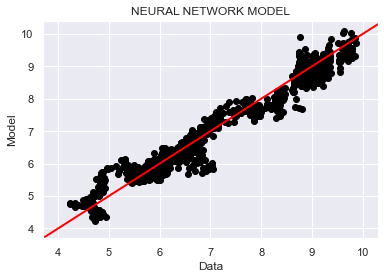

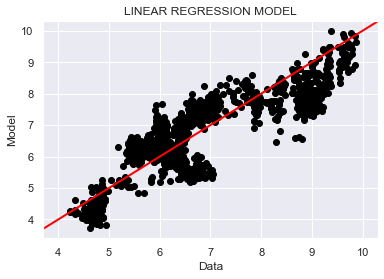

In [33]:
plt.scatter(y_train,model.predict(train_scaled)
,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('NEURAL NETWORK MODEL')
plt.show()



plt.scatter(y_train,linreg.predict(train_scaled)
,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LINEAR REGRESSION MODEL')
plt.show()


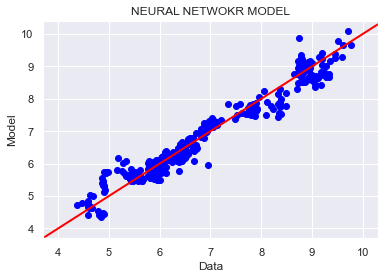

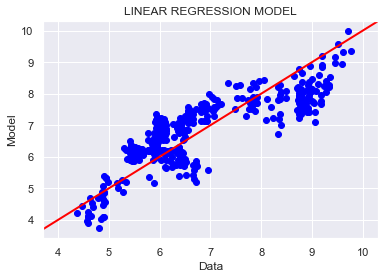

In [34]:
plt.scatter(y_test,model.predict(test_scaled)
,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('NEURAL NETWOKR MODEL')
plt.show()



plt.scatter(y_test,linreg.predict(test_scaled)
,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LINEAR REGRESSION MODEL')
plt.show()


<p><b>Further improving neural networks by optmising parameters</b></p>

In [42]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 1000],
    'activation': ['tanh', 'relu'],
    
}


In [43]:
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


In [44]:
grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5)
grid.fit(train_scaled, y_train)
print(grid.best_params_) 




/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached 

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached 

{'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 1000}


In [46]:
print ("{'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 1000}")

{'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 1000}


In [47]:
grid_predictions = grid.predict(test_scaled)

In [48]:
print (grid_predictions)

[ 6.88848359  7.77777951  5.55671384  5.72437303  7.51277023  6.01290566
  6.66799482  7.11198291  8.81735294  5.48241003  6.12589906  8.77286141
  7.60514197  7.53694825  7.90097757  7.59854447  5.51509672  4.67578054
  6.67082717  7.20899307  5.4408765   8.47960422  8.84945018  5.53200896
  5.51874767  6.40689583  6.0441597   5.62481633  6.58669067  4.61085489
  4.62043416  6.20514901  6.35297157  5.81614057  5.49406464  6.19914133
  5.5314139   6.4145817   6.6505922   6.12402801  5.8608662   8.48278266
  6.91147881  6.08191419  5.67216354  5.57050304  5.4559966   5.60451969
  8.93087474  6.15045249  5.52512128  6.30944691  7.3013715   8.62116318
  6.32202094  6.17715607  7.0809232   7.72175697  5.51323185  6.52884459
  6.2607936   7.78977401  6.40654099  6.39895988  9.31051844  9.24360749
  8.74943736  5.98708742  7.55289226  5.46606599  5.97197814  6.20522911
  7.39005076  5.06314347  5.80850965  5.58426603  7.51608907  6.24611068
  6.138666    7.3512242   7.03454001  7.71964803  5

In [50]:
y_test

,price(USD)
1358,6.812752
1480,7.592991
668,5.535443
593,5.861811
1558,8.088749
...,...
892,5.496102
1753,9.230878
916,5.891285
805,5.663134


In [52]:
nn_test_mse = mean_squared_error((y_test), grid_predictions)
print(sqrt(nn_test_mse))


0.2271870274741811


<p><b>The mean square error lower now althoug it is not as good as the tree based models, there could be multiple reasons for this, like tree based models are much more robust to highly skewed and scaled data as compared to neural networks.</b></p>

<p><b>Another possiblilty is that the neural network is analysing a weird pattern that is rather a flase indication, this could be possible as the bitcoin data has not been studied too much and hence the patterns have not been analysed a lot.</b></p>